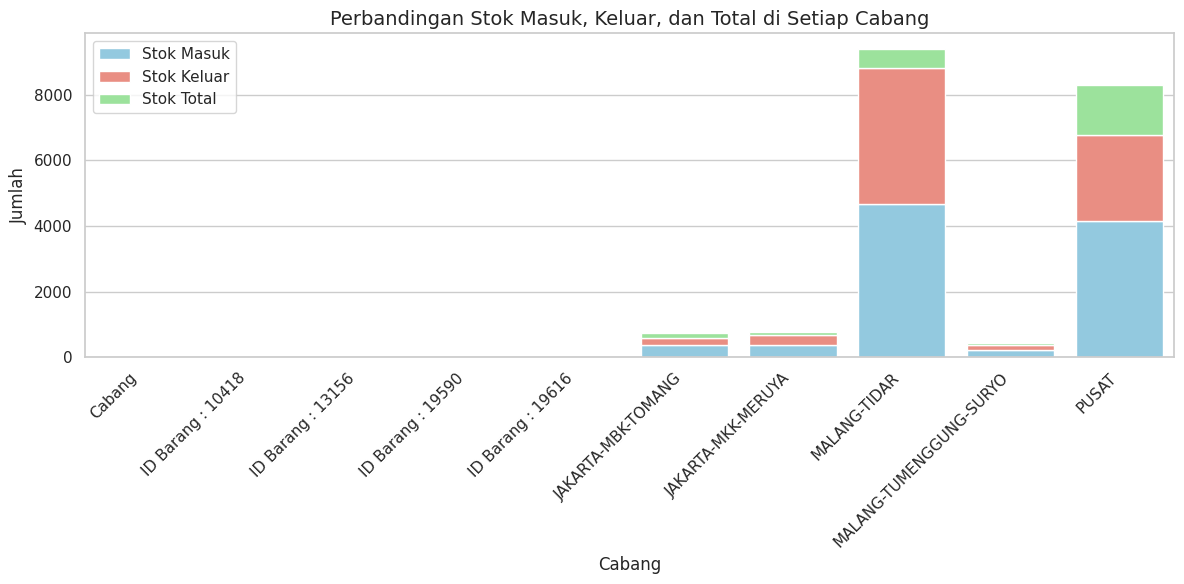

<ipython-input-9-ddf175b98e7a>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Cabang', y='Selisih', palette='coolwarm')  # Using original data for this plot


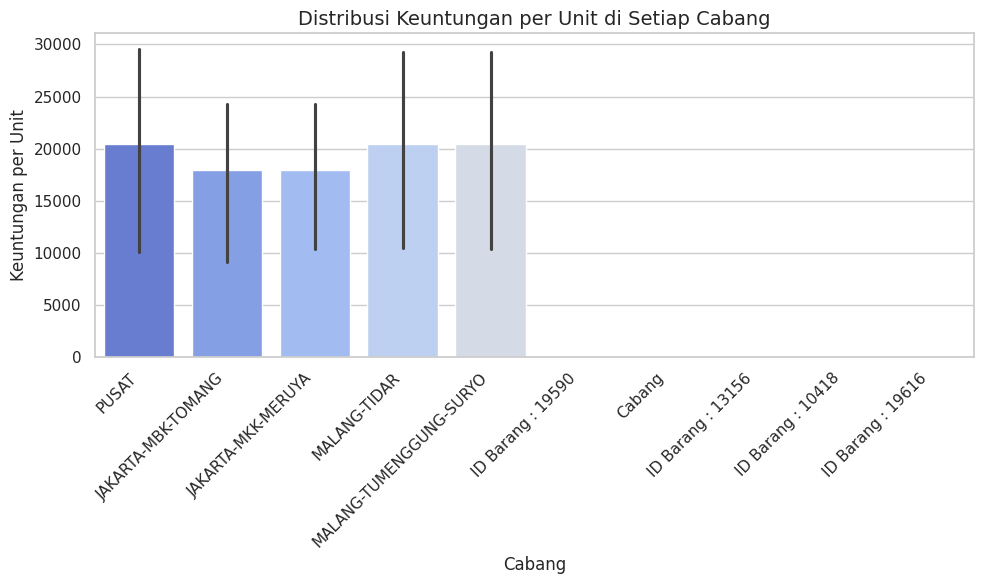

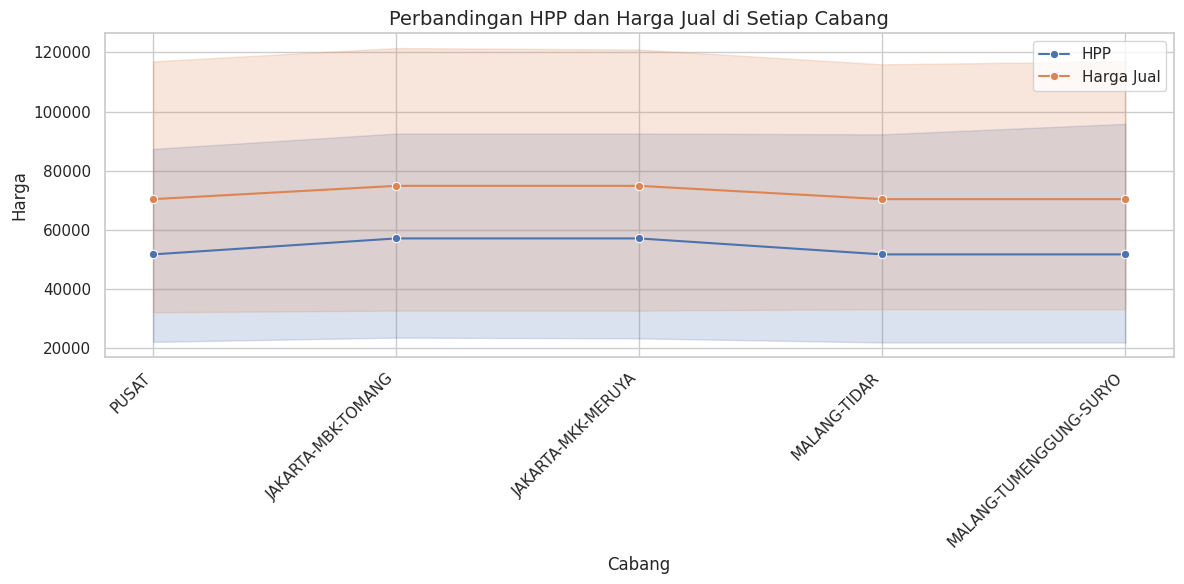

Cabang dengan stok total negatif:
                Cabang  Stok Total
0                PUSAT        -3.0
3         MALANG-TIDAR       -75.0
18  JAKARTA-MKK-MERUYA        -2.0


In [ ]:
Aimport pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memastikan visualisasi ditampilkan dalam notebook
%matplotlib inline

# Assuming 'data' is your DataFrame loaded from the Excel file

# --- Visualisasi Data ---

# 1. Perbandingan Stok Masuk, Keluar, dan Total per Cabang
plt.figure(figsize=(12, 6))

# Calculate the total Stok Masuk, Stok Keluar, and Stok Total for each Cabang
stok_masuk_per_cabang = data.groupby('Cabang')['Stok Masuk'].sum()
stok_keluar_per_cabang = data.groupby('Cabang')['Stok Keluar'].sum()
stok_total_per_cabang = data.groupby('Cabang')['Stok Total'].sum()

# Now plot using the aggregated values:
sns.barplot(x=stok_masuk_per_cabang.index, y=stok_masuk_per_cabang.values, color='skyblue', label='Stok Masuk')
sns.barplot(x=stok_keluar_per_cabang.index, y=stok_keluar_per_cabang.values, color='salmon', label='Stok Keluar', bottom=stok_masuk_per_cabang.values)
sns.barplot(x=stok_total_per_cabang.index, y=stok_total_per_cabang.values, color='lightgreen', label='Stok Total', bottom=stok_masuk_per_cabang.values + stok_keluar_per_cabang.values)

plt.title('Perbandingan Stok Masuk, Keluar, dan Total di Setiap Cabang', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Jumlah')
plt.xlabel('Cabang')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Distribusi Keuntungan per Unit di Setiap Cabang
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Cabang', y='Selisih', palette='coolwarm')  # Using original data for this plot
plt.title('Distribusi Keuntungan per Unit di Setiap Cabang', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Keuntungan per Unit')
plt.xlabel('Cabang')
plt.tight_layout()
plt.show()

# 3. HPP vs. Harga Jual per Cabang (using original data)
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Cabang', y='HPP', marker='o', label='HPP')
sns.lineplot(data=data, x='Cabang', y='Harga Jual', marker='o', label='Harga Jual')
plt.title('Perbandingan HPP dan Harga Jual di Setiap Cabang', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Harga')
plt.xlabel('Cabang')
plt.legend()
plt.tight_layout()
plt.show()

# Identifikasi Cabang dengan Stok Negatif (using original data)
stok_negatif = data[data['Stok Total'] < 0]
print("Cabang dengan stok total negatif:")
print(stok_negatif[['Cabang', 'Stok Total']])

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()  # Mengunggah file langsung di Colab
file_path = "BIG DATA TOKO BUKU.xlsx"  # Pastikan nama file sesuai setelah unggah
data = pd.ExcelFile(file_path)

# Load the specific sheet into a DataFrame
df = data.parse('buatlah tabel berikut')

# Set the first row as the header for proper column identification
df.columns = df.iloc[0]
df = df[1:]  # Remove the first row since it's now the header

# Rename columns for clarity and remove extra spaces if any
df.columns = ['Cabang', 'HPP', 'Harga Jual', 'Selisih', 'Stok Masuk', 'Stok Keluar', 'Stok Total']
df.reset_index(drop=True, inplace=True)

# Handle missing values
# Fill missing values in numeric columns with 0 and convert them to integers
numeric_columns = ['HPP', 'Harga Jual', 'Selisih', 'Stok Masuk', 'Stok Keluar', 'Stok Total']
df[numeric_columns] = df[numeric_columns].fillna(0).apply(pd.to_numeric, errors='coerce', axis=1)

# Fill missing values in the 'Cabang' column with 'Unknown'
df['Cabang'] = df['Cabang'].fillna('Unknown')

# Display the cleaned dataset summary
print("Dataset Info:")
print(df.info())
print("\nCleaned Data (Preview):")
print(df.head())


Saving BIG DATA TOKO BUKU.xlsx to BIG DATA TOKO BUKU.xlsx
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cabang       37 non-null     object 
 1   HPP          33 non-null     float64
 2   Harga Jual   29 non-null     float64
 3   Selisih      33 non-null     float64
 4   Stok Masuk   33 non-null     float64
 5   Stok Keluar  33 non-null     float64
 6   Stok Total   33 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.1+ KB
None

Cleaned Data (Preview):
                    Cabang       HPP  Harga Jual  Selisih  Stok Masuk  \
0                    PUSAT  127800.0    155000.0  27200.0        88.0   
1       JAKARTA-MBK-TOMANG  127800.0    155000.0  27200.0        32.0   
2       JAKARTA-MKK-MERUYA  127800.0    155000.0  27200.0        27.0   
3             MALANG-TIDAR  127800.0    155000.0  27200.0       200.0   
4

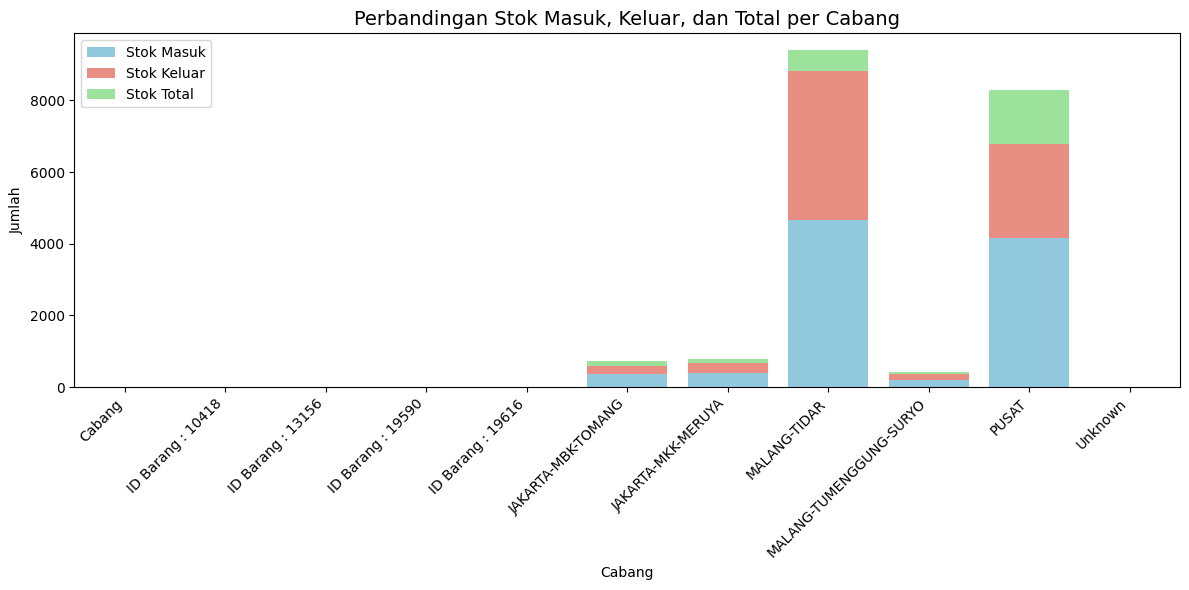

<ipython-input-9-9a7f0c8a51a8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cabang', y='Selisih', palette='coolwarm')


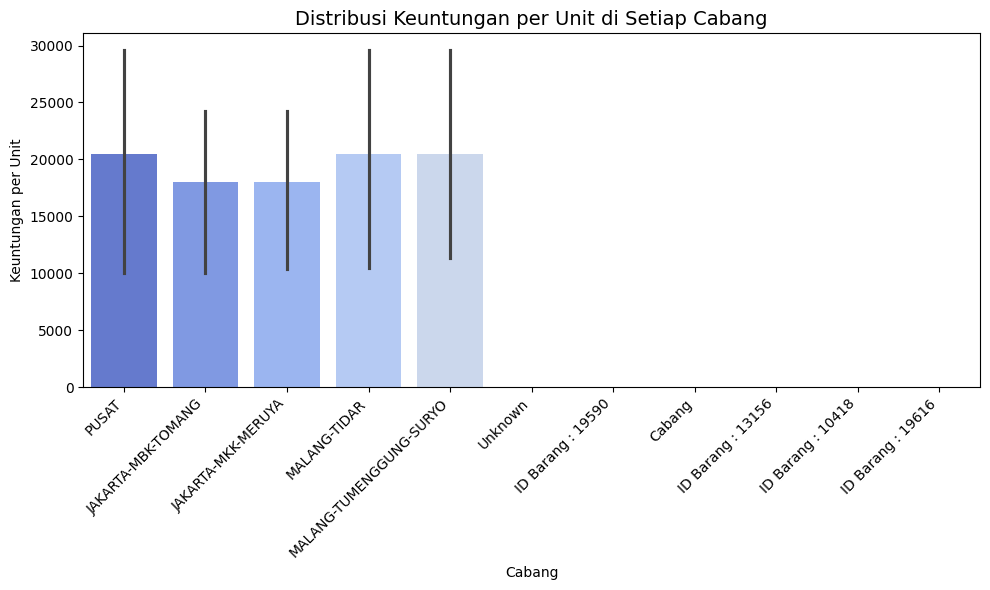

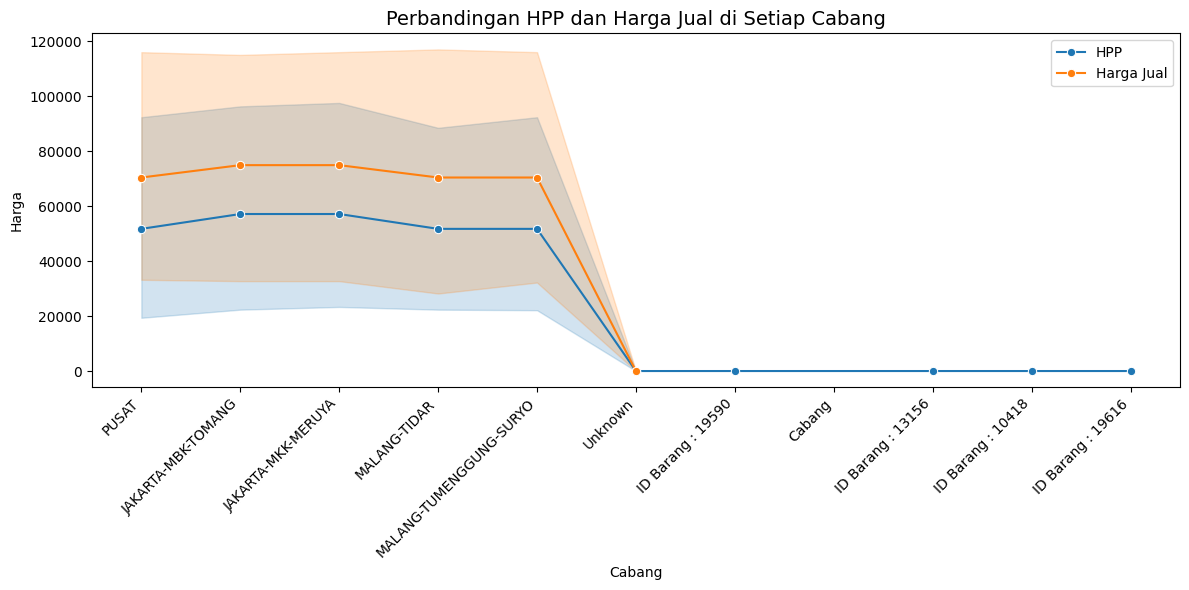

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Perbandingan Stok Masuk, Keluar, dan Total per Cabang
plt.figure(figsize=(12, 6))

# Aggregate data
stok_masuk = df.groupby('Cabang')['Stok Masuk'].sum()
stok_keluar = df.groupby('Cabang')['Stok Keluar'].sum()
stok_total = df.groupby('Cabang')['Stok Total'].sum()

# Plot
sns.barplot(x=stok_masuk.index, y=stok_masuk.values, color='skyblue', label='Stok Masuk')
sns.barplot(x=stok_keluar.index, y=stok_keluar.values, color='salmon', label='Stok Keluar', bottom=stok_masuk.values)
sns.barplot(x=stok_total.index, y=stok_total.values, color='lightgreen', label='Stok Total', bottom=(stok_masuk.values + stok_keluar.values))

plt.title('Perbandingan Stok Masuk, Keluar, dan Total per Cabang', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Jumlah')
plt.xlabel('Cabang')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Distribusi Keuntungan per Unit (Selisih)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Cabang', y='Selisih', palette='coolwarm')
plt.title('Distribusi Keuntungan per Unit di Setiap Cabang', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Keuntungan per Unit')
plt.xlabel('Cabang')
plt.tight_layout()
plt.show()

# 3. HPP vs. Harga Jual per Cabang
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Cabang', y='HPP', marker='o', label='HPP')
sns.lineplot(data=df, x='Cabang', y='Harga Jual', marker='o', label='Harga Jual')
plt.title('Perbandingan HPP dan Harga Jual di Setiap Cabang', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Harga')
plt.xlabel('Cabang')
plt.legend()
plt.tight_layout()
plt.show()
